# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.373262e+01     1.473173e+01
 * time: 0.004369020462036133
     1     6.181286e+01     9.424847e+00
 * time: 0.012845039367675781
     2     5.730653e+01     1.332171e+01
 * time: 0.1429281234741211
     3     4.111002e+01     9.094423e+00
 * time: 0.16821718215942383
     4     3.278998e+01     8.708089e+00
 * time: 0.19269013404846191
     5     3.207671e+01     8.130955e+00
 * time: 0.21332502365112305
     6     1.794137e+01     5.222238e+00
 * time: 0.2336280345916748
     7     1.392088e+01     3.460109e+00
 * time: 0.2509341239929199
     8     1.081712e+01     4.927425e+00
 * time: 0.26448702812194824
     9     8.871162e+00     3.611963e+00
 * time: 0.281447172164917
    10     7.899794e+00     2.446670e+00
 * time: 0.29865503311157227
    11     7.183731e+00     2.423015e+00
 * time: 0.3133699893951416
    12     6.723927e+00     3.022203e+00
 * time: 0.38468408584594727
    13     6.426257e+00     1.836654e+00
 * time: 0.3

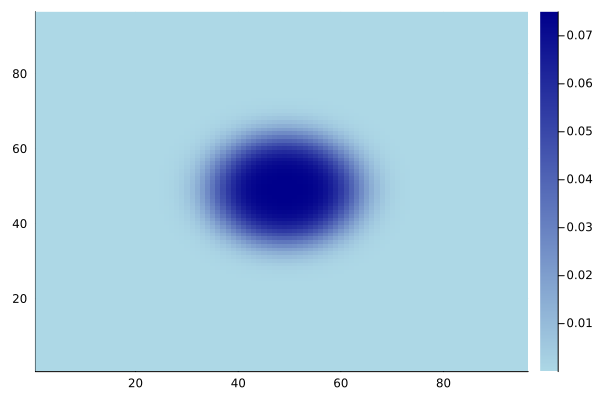

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)